# Reinforcement Project: 

## Housing Dataset

> **Method of analysis:** *Exploratory Data Analysis (EDA)*

## Six major parts of this project:

1. Data Understanding  
2. Data Cleaning/Preprocessing  
3. Data Analysis  (EDA Performed)
4. Feature Engineering
5. Visualizations
6. Insights and Recommendations

## 1 DATA UNDERSTANDING





### Purpose of the libraries:
- pandas (pd) → for data loading, cleaning, and manipulation (read_csv, DataFrame, etc.).
- matplotlib.pyplot (plt) → for plotting graphs and charts.
- seaborn (sns) → for more visually appealing statistical plots (like heatmaps, boxplots, etc.).
- numpy (np) → for numerical operations (arrays, math functions, etc.).
- scipy.stats → for statistical tests (t-tests, z-scores, correlation significance, etc.).
- itertools → for creating combinations/permutations (useful for pairwise comparisons).
- math → for mathematical functions like floor, ceil, sqrt, etc.
- warnings → to handle or ignore unwanted warnings in the output.
- warnings.filterwarnings('ignore') hides all non-critical warnings so your output stays clean.
- pd.read_csv('retail_store_sales.csv') loads your dataset into a pandas DataFrame.
- 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import itertools
import math
import warnings
warnings.filterwarnings('ignore')
warnings.warn("This warning will be hidden")
print("Script continues...")
df = pd.read_csv("retail_store_sales.csv")

Script continues...


#Data Loading

In [3]:
Housing=pd.read_csv("housing.csv",low_memory=False)               #It uses more memory but gives more accurate data type detection.

##Difference:

low_memory=True (default) → Reads CSV in chunks to save memory, but may guess wrong column types and cause DtypeWarning.

low_memory=False → Reads the whole file at once, uses more memory, but detects column types more accurately.

In [4]:
# Housing.head()
Housing.info()
# Housing.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
Housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [6]:
print(Housing.shape)
print(Housing.columns)

(4600, 18)
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


### Cleanup (Large Number of missing values)

In [7]:
Housing.isnull().sum()                     # Number of missing values in each column

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [8]:
Housing.isnull().sum().sum()                  #Count the total number of missing values in the entire DataFrame.

np.int64(134)

In [9]:
Housing.isnull().sum(axis=1).max()                     # Maximum number of missing values across the rows of the dataset

2

In [10]:
# Percentage of missing values in each column corresponding to total number of records

round((Housing.isnull().sum()/len(Housing.index)*100), 2).sort_values(ascending=False)

city             1.24
sqft_living      0.87
yr_built         0.50
sqft_lot         0.30
price            0.00
date             0.00
floors           0.00
waterfront       0.00
bathrooms        0.00
bedrooms         0.00
condition        0.00
view             0.00
sqft_basement    0.00
sqft_above       0.00
yr_renovated     0.00
street           0.00
statezip         0.00
country          0.00
dtype: float64

Percentage of Missing Values for a Column=:
Total Number of Rows / Number of Missing Values in Column ×100

In [11]:
max_missing = Housing.isnull().sum(axis=1).max()

missing_rows = Housing[Housing.isnull().sum(axis=1) == max_missing]  # Select and print only rows with the maximum number of missing values
print(missing_rows)


               date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
10  02/05/2014 0:00   463000.0         3       1.75       1710.0       NaN   
11  02/05/2014 0:00  1400000.0         4       2.50       2920.0       NaN   
12  02/05/2014 0:00   588500.0         3       1.75       2330.0       NaN   
13  02/05/2014 0:00   365000.0         3       1.00       1090.0       NaN   
24  02/05/2014 0:00   495000.0         4       1.75          NaN    6380.0   
25  02/05/2014 0:00   285000.0         3       2.50          NaN   10834.0   
26  02/05/2014 0:00   615000.0         3       1.75          NaN    7291.0   
27  02/05/2014 0:00   698000.0         4       2.25          NaN   11250.0   
28  02/05/2014 0:00   675000.0         5       2.50          NaN   67518.0   
29  02/05/2014 0:00   790000.0         3       2.50          NaN    4750.0   
30  02/05/2014 0:00   382500.0         4       1.75          NaN    8700.0   
31  02/05/2014 0:00   499950.0         4       2.50          NaN

## 2) DATA CLEANING AND PREPROCESSING

Fixing Rows and Columns

In [24]:
Housing.duplicated().sum()                    # Number of duplicate rows
Housing[Housing.duplicated()]                   # Display duplicate rows

np.int64(0)

In [25]:
Housing.dropna(how='all', inplace=True)          #Remove Duplicates from the dataframe

In [14]:
Housing['price'].value_counts()

price
0.0000         49
300000.0000    42
400000.0000    31
440000.0000    29
600000.0000    29
               ..
242500.0000     1
257950.0000     1
454790.0000     1
473200.0000     1
433111.1111     1
Name: count, Length: 1743, dtype: int64

In [15]:
mean_price = Housing['price'].mean()
Housing['price'] = Housing['price'].replace(0, mean_price)    # Replacing 0 values with mean of the column


In [16]:
Housing['sqft_lot'].value_counts()

sqft_lot
5000.0     80
6000.0     64
4000.0     53
7200.0     50
4800.0     29
           ..
7552.0      1
10032.0     1
1075.0      1
18226.0     1
8892.0      1
Name: count, Length: 3105, dtype: int64

### TREATING AS MISSING VALUES
>Some columns may have a small number of missing entries where imputation cannot be justified (e.g., model-specific specifications or categorical details like 'ScreenResolution'). >In such cases, we may either leave them as NaN (to be appropriately handled during analysis/visualization) or explicitly mark them as "Unknown" for clarity.

In [17]:
Housing['sqft_lot'] = Housing['sqft_lot'].replace(0) # Replacing Empty values with 0 of the column

In [18]:
Housing.isnull().sum(axis=0)

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [19]:
# Fill missing values based on column type
for column in Housing.columns:
    if Housing[column].dtype in ['float64', 'int64']:
        # Replace NaN with mean
        Housing[column].fillna(Housing[column].mean(), inplace=True)
    else:
        # Replace NaN with mode (most frequent value)
        Housing[column].fillna(Housing[column].mode()[0], inplace=True)

In [20]:
Housing.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built         float64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [21]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   float64
 5   sqft_lot       4600 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [22]:
Housing['waterfront'].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

## 3) Data Analysis (EDA Performed)

## Exploratory Data Analysis (EDA) Explanation and Types

What is Exploratory Data Analysis (EDA)?
>EDA is the process of exploring and summarizing datasets to understand their structure, patterns, and key features.

### 1. Univariate Analysis
> Focuses on a single variable to understand its distribution,

### 2. Bivariate Analysis
>Studies the relationship between two variables to detect connections,


### 3. Multivariate Analysis
>Explores three or more variables simultaneously to understand complex relationships,

# -=-=-=-=-=-=-=-=-=-=-=-=-=
# Univariate Analysis
# -=-=-=-=-=-=-=-=-=-=-=-=-=

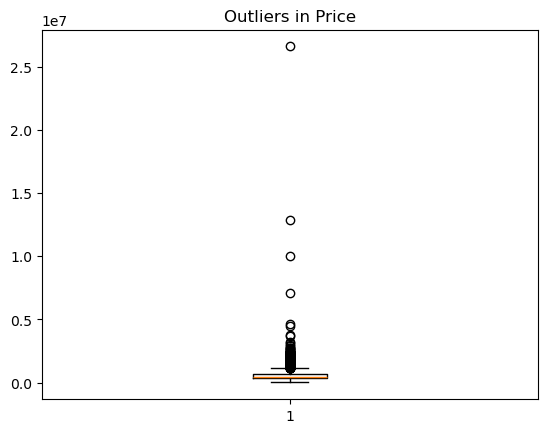

In [23]:
plt.boxplot(Housing['price'])
plt.title("Outliers in Price")
plt.show()


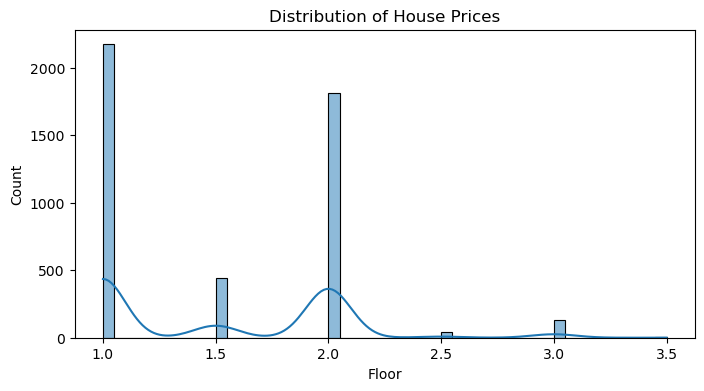

In [26]:
# Variant 1: Price Distribution
plt.figure(figsize=(8,4))
sns.histplot(Housing['floors'], kde=True, bins=50)
plt.title("Distribution of House Prices")
plt.xlabel("Floor Size")
plt.ylabel("Count")
plt.show()

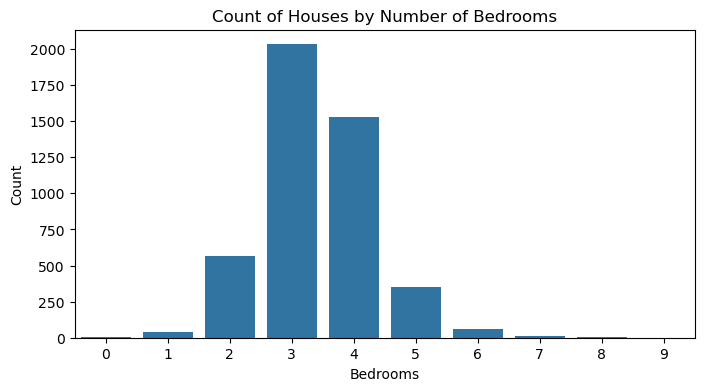

In [32]:
# Variant 2: Distribution of Number of Bedrooms
plt.figure(figsize=(8,4))
sns.countplot(x='bedrooms', data=Housing)
plt.title("Count of Houses by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

# -=-=-=-=-=-=-=-=-=-=-=-=-=
# Bivariate Analysis
# -=-=-=-=-=-=-=-=-=-=-=-=-=

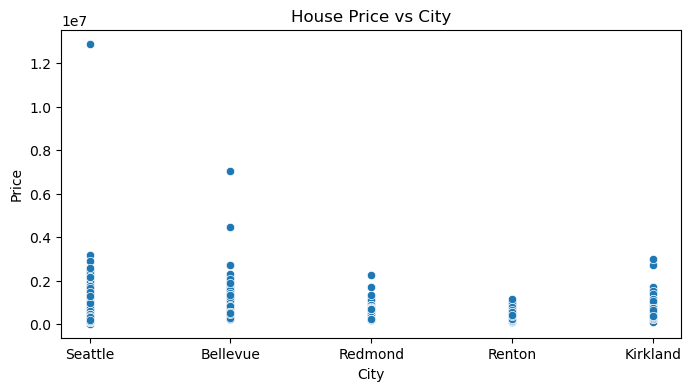

In [33]:
# Variant 1: Price vs City (scatter)

# Get top 5 cities by house count
top_cities = Housing['city'].value_counts().head(5).index

# Filter dataset for only those cities
filtered_data = Housing[Housing['city'].isin(top_cities)]

plt.figure(figsize=(8,4))
sns.scatterplot(x='city', y='price', data=filtered_data)
plt.title("House Price vs City")
plt.xlabel("City")
plt.ylabel("Price")
plt.show()

# =========================
# Multivariate Analysis
# =========================

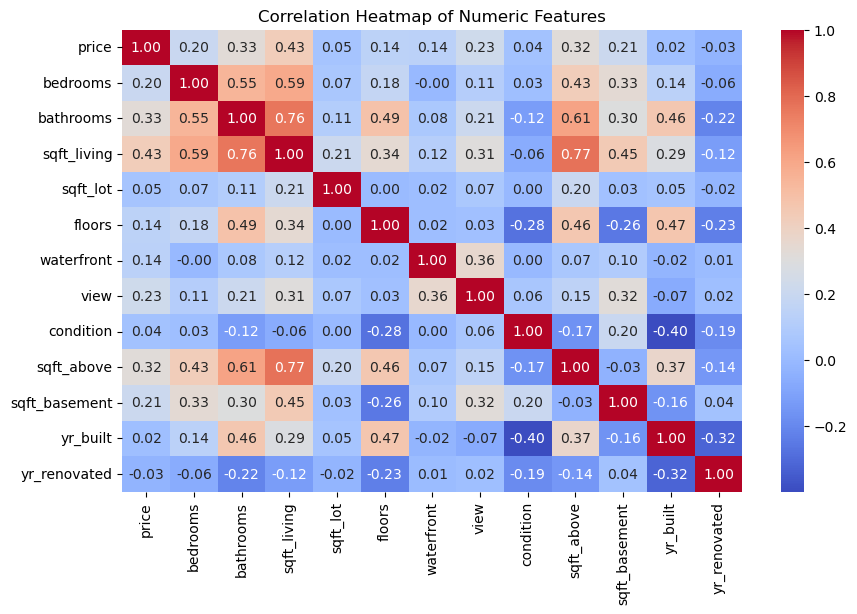

In [34]:
plt.figure(figsize=(10,6))

# Select only numeric columns for correlation
numeric_cols = Housing.select_dtypes(include=['int64','float64']).columns

# Correlation matrix
corr = Housing[numeric_cols].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

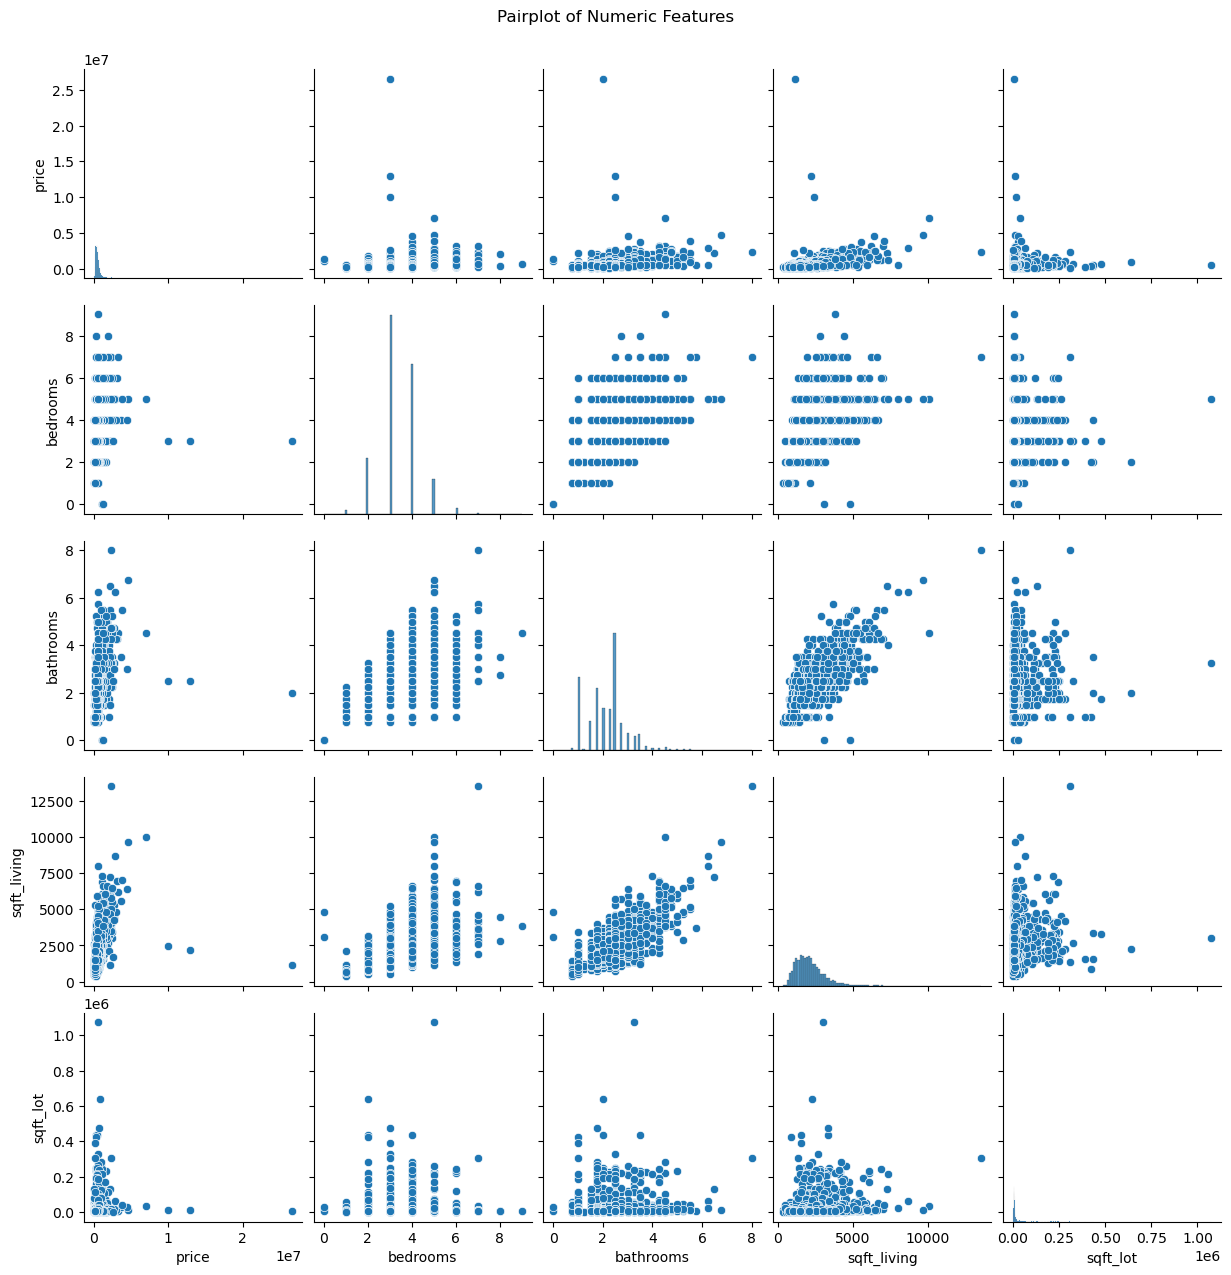

In [35]:
# 1. Pairplot (relationships among multiple numeric features)
# --------------------------
numeric_cols = Housing.select_dtypes(include=['int64','float64']).columns

sns.pairplot(Housing[numeric_cols[:5]])  # take first 5 numeric features
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

## 5) Visualizations

### Prize vs Features

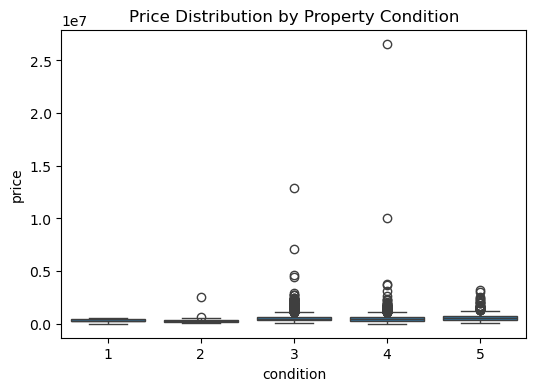

In [30]:
## Boxplot for price by condition
plt.figure(figsize=(6, 4))
sns.boxplot(x='condition', y='price', data=Housing)
plt.title('Price Distribution by Property Condition')
plt.show()

## 6) Feature Engineering

# Create New Features

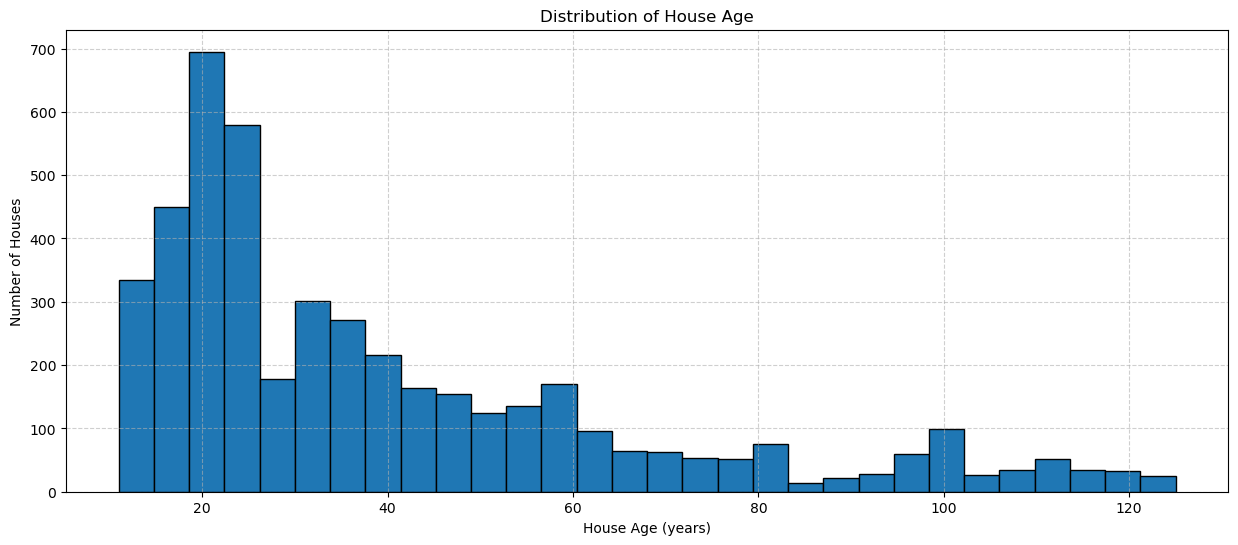

In [37]:
Housing['house_age'] = Housing.apply(
    lambda row: (2025 - row['yr_built']) if row['yr_renovated'] == 0
                else (2025 - row['yr_renovated']),
    axis=1
)

plt.figure(figsize=(15,6))
plt.hist(Housing['house_age'], bins=30, edgecolor="black")
plt.title("Distribution of House Age")
plt.xlabel("House Age (years)")
plt.ylabel("Number of Houses")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

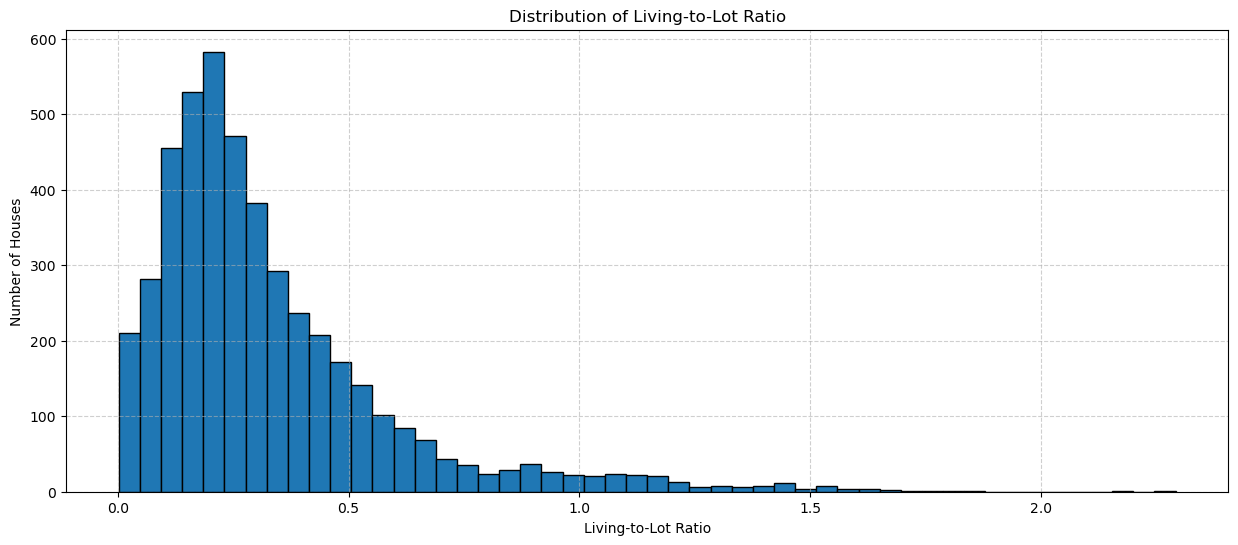

In [38]:
# Living-to-lot ratio
Housing['living_lot_ratio'] = Housing['sqft_living'] / Housing['sqft_lot']

plt.figure(figsize=(15,6))
plt.hist(Housing['living_lot_ratio'], bins=50, edgecolor="black")
plt.title("Distribution of Living-to-Lot Ratio")
plt.xlabel("Living-to-Lot Ratio")
plt.ylabel("Number of Houses")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [39]:
# Box plot for Price to spot outliers


In [40]:
import pandas as pd
from scipy import stats

# Load dataset
df = pd.read_csv("housing.csv")

# Split into two groups: waterfront vs non-waterfront
group1 = df[df['waterfront'] == 1]['price']
group2 = df[df['waterfront'] == 0]['price']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀ → Significant difference in prices.")
else:
    print("Fail to reject H₀ → No significant difference in prices.")


T-statistic: 3.6403
P-value: 0.000948
Reject H₀ → Significant difference in prices.


In [41]:
import pandas as pd
from scipy import stats


df = pd.read_csv("housing.csv")

# Select the 'price' column
prices = df['price']

# Expected mean (population mean)
mu = 500000

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(prices, mu)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀ → Mean price is significantly different from 500,000.")
else:
    print("Fail to reject H₀ → Mean price is not significantly different from 500,000.")


T-statistic: 6.2994
P-value: 0.000000
Reject H₀ → Mean price is significantly different from 500,000.


In [42]:
df['waterfront'].value_counts()


waterfront
0    4567
1      33
Name: count, dtype: int64